In [ ]:
import pandas as pd
import numpy as np

import io
from google.colab import files

from sklearn.impute import KNNImputer
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from matplotlib import pyplot
plt.style.use('ggplot')
%matplotlib inline  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/Data Mining/df_slidingwindow.csv', encoding= 'unicode_escape')
df

,Unnamed: 0,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,0,0,562.050000,-0.620000,-10.700000,-4.330000,0.000000,0.000000,0.000000,0.000000,...,-15.150000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,28.0,0.0,0.0
1,1,1,368.855000,-28.855000,-4.195000,-3.500000,0.000000,0.000000,0.000000,0.000000,...,-9.315000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,16.0,0.0,0.0
2,2,2,200.160000,-57.090000,2.310000,-4.330000,0.000000,0.000000,0.000000,0.000000,...,-9.380000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.0,0.0,0.0
3,3,3,258.575000,-188.580000,1.580000,-3.500000,0.000000,0.000000,0.000000,0.000000,...,-6.430000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.5,0.0,0.0
4,4,4,316.990000,-57.090000,0.850000,-2.670000,0.000000,0.000000,0.000000,0.000000,...,-3.480000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,15.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,30763,30763,1084.140028,-662.823937,-7.296511,-0.595615,0.000000,0.000000,-0.342862,-0.263477,...,1.829975,0.140486,-0.34,-0.173467,-0.171007,0.389877,0.645714,112.0,7.0,1.0
30764,30764,30764,1097.738080,-664.774544,-7.831900,-0.861126,0.000000,0.000000,-0.342862,-0.325503,...,0.835911,0.140486,-0.34,-0.224893,-0.371636,0.389877,0.688973,112.0,7.0,1.0
30765,30765,30765,1097.738080,-662.823937,-7.831900,-0.595615,0.000000,0.000000,-0.342862,-0.263477,...,2.023392,0.140486,-0.34,-0.173467,-0.203368,0.176223,0.688973,86.0,7.0,1.0
30766,30766,30766,1097.738080,-154.983826,-7.831900,2.167211,-0.028543,0.022734,-0.170105,-0.141526,...,5.694333,0.140486,-0.34,-0.086632,0.000000,0.000000,0.557132,59.5,6.5,1.0


In [ ]:
df.isnull().sum()

Unnamed: 0         0
id                 0
x1                 0
y1                 0
xVel1              0
                  ..
xC200              0
yC200              0
nAC200             0
nS200              0
Swarm_Behaviour    0
Length: 2403, dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
count,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,...,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000,30768.000000
mean,15383.500000,15383.500000,108.245350,-179.247558,-0.651351,0.603050,-0.038565,0.161736,-0.012191,0.010704,...,0.688406,-0.012886,0.129510,-0.000639,-0.006642,0.034836,0.012790,25.230645,1.380151,0.500943
std,8882.100878,8882.100878,425.566345,326.935938,2.557026,4.280788,0.128417,0.341276,0.869299,0.476528,...,4.109892,0.154814,0.312334,0.346236,0.294237,0.341911,0.319976,28.975890,4.781069,0.500007
min,0.000000,0.000000,-1235.220000,-932.449982,-14.049796,-11.834354,-0.975000,-0.991315,-131.328089,-48.303423,...,-15.150000,-0.880000,-0.950000,-9.925976,-5.923040,-2.435691,-2.667780,0.500000,0.000000,0.000000
25%,7691.750000,7691.750000,-206.600000,-415.630782,-1.910000,-2.635000,-0.040000,0.000000,0.000000,0.000000,...,-2.261366,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000
50%,15383.500000,15383.500000,107.100000,-188.307500,-0.565000,-0.205000,0.000000,0.000000,0.000000,0.000000,...,-0.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.500000,0.000000,1.000000
75%,23075.250000,23075.250000,399.192500,43.157500,0.670000,3.215000,0.000000,0.065000,0.000000,0.000000,...,3.280643,0.000000,0.015000,0.000000,0.000000,0.000000,0.000000,25.000000,0.500000,1.000000
max,30767.000000,30767.000000,1299.114939,893.767274,13.642798,13.457889,0.981512,1.040000,11.365485,16.248544,...,12.839939,1.000000,1.040000,5.486373,5.181305,2.664458,2.649374,123.500000,49.500000,1.000000


In [ ]:
x = df.drop(columns = ["Swarm_Behaviour", "id", "Unnamed: 0"])
y = df[["Swarm_Behaviour"]]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 99)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24614, 2400), (6154, 2400), (24614, 1), (6154, 1))

In [ ]:
x_train = np.array(x_train).reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = np.array(x_test).reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape, y_train.shape, x_train.shape, y_test.shape)

(24614, 1, 2400) (24614, 1) (24614, 1, 2400) (6154, 1)


Epoch 1/50
342/342 - 7s - loss: 0.4469 - accuracy: 0.6165 - val_loss: 0.4043 - val_accuracy: 0.6537 - 7s/epoch - 20ms/step
Epoch 2/50
342/342 - 4s - loss: 0.3909 - accuracy: 0.6615 - val_loss: 0.3835 - val_accuracy: 0.6719 - 4s/epoch - 11ms/step
Epoch 3/50
342/342 - 4s - loss: 0.3716 - accuracy: 0.6944 - val_loss: 0.3617 - val_accuracy: 0.7004 - 4s/epoch - 11ms/step
Epoch 4/50
342/342 - 4s - loss: 0.3582 - accuracy: 0.6976 - val_loss: 0.3586 - val_accuracy: 0.6877 - 4s/epoch - 10ms/step
Epoch 5/50
342/342 - 4s - loss: 0.3439 - accuracy: 0.7084 - val_loss: 0.3488 - val_accuracy: 0.7018 - 4s/epoch - 11ms/step
Epoch 6/50
342/342 - 3s - loss: 0.3312 - accuracy: 0.7178 - val_loss: 0.3402 - val_accuracy: 0.7091 - 3s/epoch - 10ms/step
Epoch 7/50
342/342 - 4s - loss: 0.3279 - accuracy: 0.7113 - val_loss: 0.3705 - val_accuracy: 0.6753 - 4s/epoch - 11ms/step
Epoch 8/50
342/342 - 4s - loss: 0.3420 - accuracy: 0.6874 - val_loss: 0.3323 - val_accuracy: 0.6997 - 4s/epoch - 11ms/step
Epoch 9/50
342/3

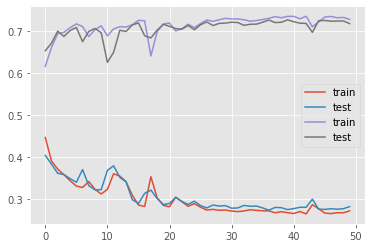

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
# fit network
history = model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()